In [1]:
import tensorflow as tf
from Dirichlet_BC_NN import *#Dirichlet_BC_NN, Dirichlet_BC_NN_2
from Lp_integral_norm import Lp_integral_norm
from generate_laplace_soln import generate_laplace_soln
import numpy as np
import matplotlib.pyplot as plt
#tf.enable_eager_execution()
tf.keras.backend.set_floatx('float64')

In [2]:
#mod = Dirichlet_BC_NN()
mod = Dirichlet_BC_NN_2B(data_format = 'channels_first', mse_component_weight = 1e+1, x_output_resolution = 64)
mod((tf.random.uniform((10,1,74), dtype = tf.keras.backend.floatx()), tf.random.uniform((10,1), dtype = tf.keras.backend.floatx())))
from IPython.display import clear_output
clear_output()
mod.load_weights('Dirichlet_BC_NN.h5')
#mod = Dirichlet_BC_NN_3()

In [3]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)

In [3]:
def dataset_generator():
    while True:
        nx = 64#np.random.randint(64,128)
        ny = 64#np.random.randint(64,128)
        boundaries, soln, dx = generate_laplace_soln(batch_size=75, nonzero_boundaries=['left'], smoothness=np.random.randint(5,20), nx = nx, ny = ny)
        yield ([tf.expand_dims(boundaries['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')], soln)

In [4]:
cb = []#[tf.keras.callbacks.ModelCheckpoint('Dirichlet_BC_NN.h5', monitor='mse', verbose=1, save_best_only=True, save_weights_only=True), tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_lr = 1e-15, verbose = True, patience = 3)]
mod.compile(loss = mod.integral_loss, optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4), metrics = ['mse', 'mae'])
mod.run_eagerly = True
mod.fit_generator(generator=dataset_generator(), steps_per_epoch=200, epochs=5000, validation_data=dataset_generator(), validation_steps=3, callbacks=cb)


Epoch 1/5000


ValueError: could not broadcast input array from shape (75,64) into shape (75,1,64)

In [5]:
mod.load_weights('Dirichlet_BC_NN_2B.h5')
mod.summary()

Model: "dirichlet_bc_nn_2b"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              multiple                  24        
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  168       
_________________________________________________________________
conv1d_2 (Conv1D)            multiple                  10496     
_________________________________________________________________
sep_conv_block (SepConvBlock multiple                  15752     
_________________________________________________________________
sep_conv_block_1 (SepConvBlo multiple                  45744     
_________________________________________________________________
sep_conv_block_2 (SepConvBlo multiple                  45744     
_________________________________________________________________
conv2d_3 (Conv2D)            multiple           

In [5]:
b, soln, dx = generate_laplace_soln(batch_size=75, nonzero_boundaries=['left'], smoothness=np.random.randint(5,20), nx = 64, ny = 64)

(64, 64)
(64, 64)


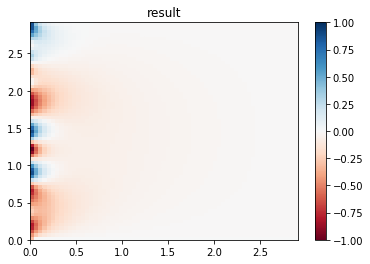

In [6]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]), indexing = 'ij')
p_r = np.random.randint(0,soln.shape[0])
z = soln[p_r,0,...]
print(z.shape)
print(x.shape)
#z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = tf.divide(mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]-soln[p_r,0,...], soln[p_r,0,...])
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

(64, 64)
(64, 64)


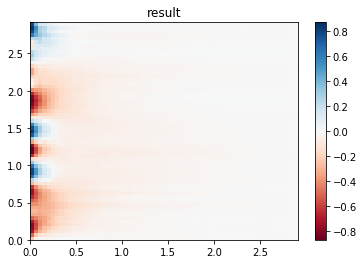

In [7]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
#z = soln[p_r,0,...]
print(z.shape)
print(x.shape)
z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]-soln[p_r,0,...]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

(95, 96)
(94, 95)


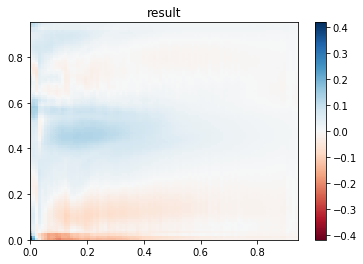

In [27]:
x, y = np.meshgrid(np.linspace(0, soln.shape[-2]*dx, soln.shape[-2]-1), np.linspace(0, soln.shape[-1]*dx, soln.shape[-1]-1), indexing = 'ij')
#p_r = np.random.randint(0,soln.shape[0])
#z = soln[p_r,0,...]
print(z.shape)
print(x.shape)
z = mod([tf.expand_dims(b['left'], axis = 1), dx * tf.ones((soln.shape[0],1), dtype = 'float64')])[p_r,0,1:-1,1:-1] - soln[p_r,0,1:-1,1:-1]

#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]
#z = mod(tf.expand_dims(b['left'], axis = 1))[p_r,0,...]-soln[p_r,0,...]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('result')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()



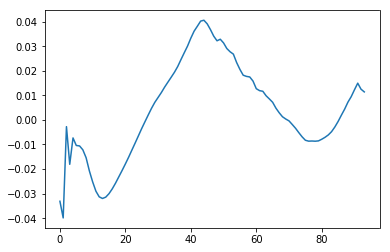

In [31]:
plt.plot(z[56,:])

In [12]:
z.shape

TensorShape([256, 256])

TypeError: only integer scalar arrays can be converted to a scalar index